<div align="center">
<font size="5">__cta-lstchain: Notebook for testing the effects of impact parameters on the energy reconstruction__</font>
    
<font size="4">
To run this notebook you will need the last version of cta-lstchain:

git clone https://github.com/cta-observatory/cta-lstchain
<br>
<br>
**If you have ctapipe already installed in a conda environment:**
<br><br>
source activate cta-dev
<br>
python setup.py install
<br>
<font size="4">
**If you don't have ctapipe installed:**</font>
<br><br>
conda env create -f environment.yml
<br>
source activate cta-dev
<br>
python setup.py install

Also, you will need the datafiles from **cta-lstchain-extra:**

git clone https://github.com/misabelber/cta-lstchain-extra


<font size="4">
**Some imports...**

In [1]:
import numpy as np                                                                                            
import pandas as pd                                                                                                                                                                                      
import matplotlib.pyplot as plt                                                                                                                                                             
from lstchain.reco import reco_dl1_to_dl2     
from lstchain.visualization import plot_dl2                                                                   
from lstchain.reco import utils
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['font.size'] = 14

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

<font size="4">
**Get event DL1 file for training.**
<br>
Gammas are pointlike.

In [3]:
try:
    PATH_EVENTS = "/Users/thomasvuillaume/Work/CTA/Data/simu_mc/DL1-param/ctapipe/LaPalma/"
    gammafile = PATH_EVENTS+"/ctapipe_gamma_point_source.h5"
    df_gammas = pd.read_hdf(gammafile) 
    
except:
    PATH_EVENTS = "../../cta-lstchain-extra/reco/sample_data/dl1/"
    gammafile = PATH_EVENTS+"/gamma_events_point_tiny.h5"
    df_gammas = pd.read_hdf(gammafile) 

<font size="4">
We read the file as pandas dataframes:

In [4]:
df_gammas.keys()

Index(['disp', 'event_id', 'gps_time', 'hadroness', 'intensity', 'intercept',
       'kurtosis', 'length', 'mc_alt', 'mc_alt_tel', 'mc_az', 'mc_az_tel',
       'mc_core_distance', 'mc_core_x', 'mc_core_y', 'mc_energy',
       'mc_h_first_int', 'mc_type', 'mc_x_max', 'obs_id', 'phi', 'psi', 'r',
       'skewness', 'src_x', 'src_y', 'time_gradient', 'width', 'wl', 'x', 'y'],
      dtype='object')

In [5]:
df_gammas.describe()

,disp,event_id,gps_time,hadroness,intensity,intercept,kurtosis,length,mc_alt,mc_alt_tel,...,psi,r,skewness,src_x,src_y,time_gradient,width,wl,x,y
count,1.041220e+06,1.041220e+06,1.041220e+06,1041220.0,1.041220e+06,1.041220e+06,1.041220e+06,1.041220e+06,1.041220e+06,1.041220e+06,...,1.041220e+06,1.041220e+06,1.041220e+06,1.041220e+06,1.041220e+06,1.041220e+06,1.041220e+06,1.041220e+06,1.041220e+06,1.041220e+06
mean,5.181611e-01,1.249260e+06,1.482583e+09,0.0,2.261162e+00,9.467865e+00,3.035859e+00,2.381407e-01,1.221730e+00,1.221730e+00,...,1.256745e-02,5.181611e-01,5.363299e-02,4.143943e-13,-2.920628e-06,4.292890e+00,7.320211e-02,3.968544e-01,3.534398e-03,3.736016e-03
std,2.555405e-01,7.218174e+05,9.157393e+04,0.0,5.014829e-01,1.546993e+00,2.924404e+00,1.969533e-01,0.000000e+00,0.000000e+00,...,1.773100e+00,2.555405e-01,9.307090e-01,5.553583e-28,3.388133e-21,8.649471e+00,4.572287e-02,1.879584e-01,3.827390e-01,4.327545e-01
min,4.365838e-04,1.010000e+02,1.482403e+09,0.0,1.081883e+00,0.000000e+00,1.000000e+00,3.207343e-02,1.221730e+00,1.221730e+00,...,-3.141585e+00,4.336635e-04,-7.508383e+00,4.143943e-13,-2.920628e-06,-3.600000e+02,0.000000e+00,0.000000e+00,-1.161710e+00,-1.073218e+00
25%,3.144673e-01,6.242050e+05,1.482516e+09,0.0,1.901178e+00,8.362992e+00,1.965048e+00,1.062891e-01,1.221730e+00,1.221730e+00,...,-1.552460e+00,3.144673e-01,-2.595735e-01,4.143943e-13,-2.920628e-06,-1.030301e-13,4.740380e-02,2.620048e-01,-2.482420e-01,-3.034892e-01
50%,4.830744e-01,1.250108e+06,1.482537e+09,0.0,2.147559e+00,9.220615e+00,2.319945e+00,1.848982e-01,1.221730e+00,1.221730e+00,...,3.493790e-02,4.830726e-01,1.219067e-01,4.143943e-13,-2.920628e-06,3.716219e+00,6.172455e-02,3.679386e-01,6.137755e-03,5.425202e-03
75%,7.145497e-01,1.874201e+06,1.482686e+09,0.0,2.513439e+00,1.033976e+01,2.902295e+00,3.005166e-01,1.221730e+00,1.221730e+00,...,1.569814e+00,7.145472e-01,5.060897e-01,4.143943e-13,-2.920628e-06,9.178517e+00,8.413976e-02,5.145831e-01,2.567049e-01,3.109910e-01
max,1.173642e+00,2.500009e+06,1.482749e+09,0.0,5.051207e+00,2.900000e+01,7.684123e+01,2.082153e+00,1.221730e+00,1.221730e+00,...,3.141582e+00,1.173639e+00,8.083143e+00,4.143943e-13,-2.920628e-06,5.600120e+02,1.099491e+00,9.995533e-01,1.167237e+00,1.072021e+00


<font size="4">
Energy should be proportional to intensity:

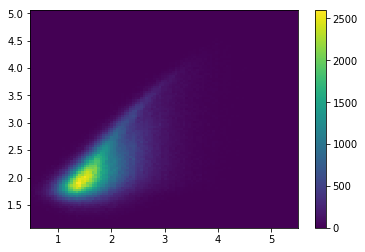

In [6]:
h = plt.hist2d(df_gammas['mc_energy'],df_gammas['intensity'],bins=100)
plt.colorbar(h[3])

<font size="4">
Let's choose events with a closer impact parameter (>40m, <100m)

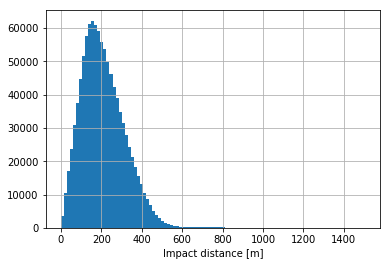

In [7]:
df_gammas.mc_core_distance.hist(bins=100);
plt.xlabel('Impact distance [m]');

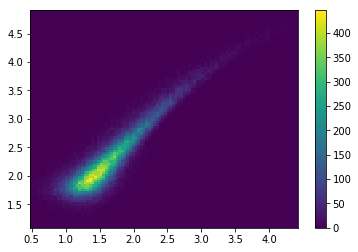

In [8]:
filter_impact = (df_gammas.mc_core_distance > 40) & (df_gammas.mc_core_distance < 100)
closer = df_gammas[filter_impact]
c = plt.hist2d(closer['mc_energy'],closer['intensity'],bins=100)
plt.colorbar(c[3]);

<font size="4">
Correlation is much more clear for this range. 
<br><br>
Let's see how this cut affect to the energy reconstruction.
<br><br>
First of all, let's train a Random Forest with all events, **without any cut** and without using any mc information.
<br>
Choose the features for training the random forest (Hillas and Timing parameters) 

In [9]:
features = ['intensity',                                                                                  
            'time_gradient',                                                                              
            'width',                                                                                      
            'length',                                                                                     
            'wl',                                                                                         
            'phi',                                                                                        
            'psi',
            'skewness',
            'kurtosis']

<font size="4">
Split data into train and test sets.

In [10]:
np.random.seed(0)
train, test = reco_dl1_to_dl2.split_traintest(df_gammas, 0.8)
print("Training datasets: {} events \nTest dataset: {} events".format(len(train), len(test)))

Training datasets: 832375 events 
Test dataset: 208845 events


<font size="4">
And train Random Forests for Energy and Disp reconstruction.

In [11]:
RFreg_Energy, RFreg_Disp = reco_dl1_to_dl2.trainRFreco(train,features)

Given features:  ['intensity', 'time_gradient', 'width', 'length', 'wl', 'phi', 'psi', 'skewness', 'kurtosis']
Number of events for training:  832375
Training Random Forest Regressor for Energy Reconstruction...
Random Forest trained!
Training Random Forest Regressor for disp Reconstruction...
Random Forest trained!
Done!


<font size="4">
Apply RF to test data to reconstruct Energy.

/Users/thomasvuillaume/anaconda/envs/cta-dev/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


-0.035467090274441386 0.522067997620627


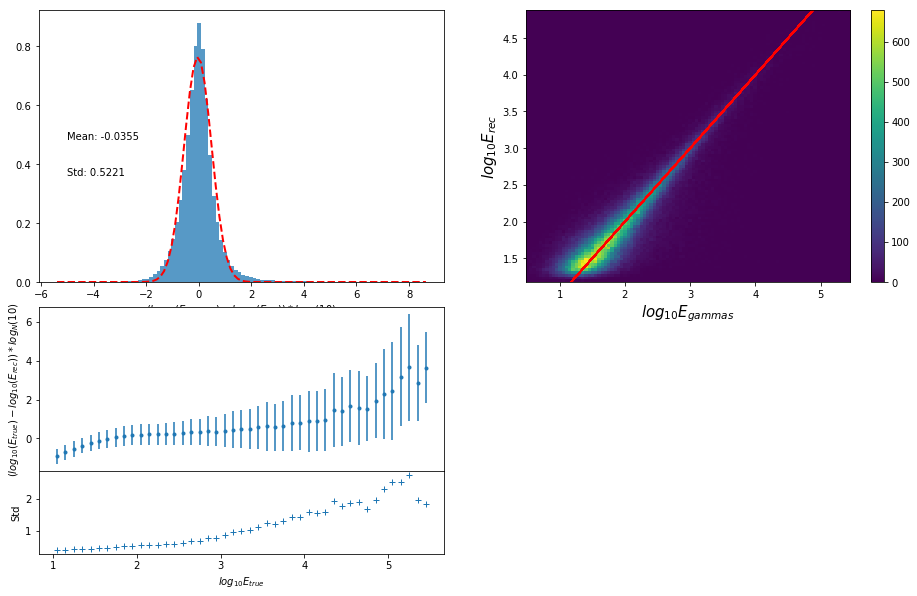

In [12]:
test['e_rec'] = RFreg_Energy.predict(test[features])
plt.figure(figsize=(16,10))
plot_dl2.plot_e(test,True)

<font size="4">
The error is 60%.
<br>
<br>
    Now, lets do the cuts on impact parameter to have closer events.

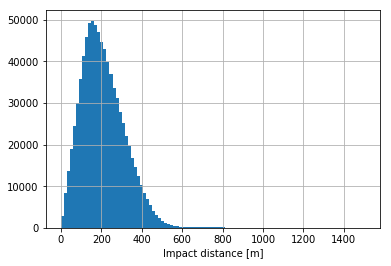

In [13]:
train.mc_core_distance.hist(bins=100);
plt.xlabel('Impact distance [m]');

In [14]:
train_cut = train[(train.mc_core_distance>40) & (train.mc_core_distance<100)]
test_cut = test[(test.mc_core_distance>40) & (test.mc_core_distance<100)]

<font size="4">
    Train the RF again.

In [15]:
RFreg_Energy, RFreg_Disp = reco_dl1_to_dl2.trainRFreco(train_cut, features)

Given features:  ['intensity', 'time_gradient', 'width', 'length', 'wl', 'phi', 'psi', 'skewness', 'kurtosis']
Number of events for training:  100946
Training Random Forest Regressor for Energy Reconstruction...
Random Forest trained!
Training Random Forest Regressor for disp Reconstruction...
Random Forest trained!
Done!


Feature importances (gini index)
1. intensity (0.974372)
2. psi (0.005681)
3. length (0.005288)
4. kurtosis (0.003638)
5. time_gradient (0.003497)
6. skewness (0.002069)
7. phi (0.002012)
8. width (0.001736)
9. wl (0.001706)


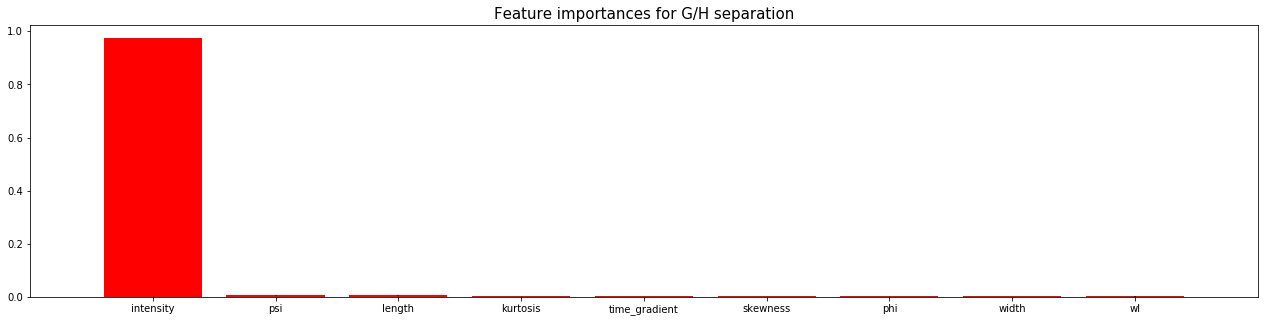

In [16]:
from lstchain.visualization.plot_dl2 import plot_importances
plt.figure(figsize=(22,5))
plot_importances(RFreg_Energy, features);

<font size="4">
    And reconstruct the energy.

/Users/thomasvuillaume/anaconda/envs/cta-dev/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


-0.0014232849411832378 0.4053464686300375


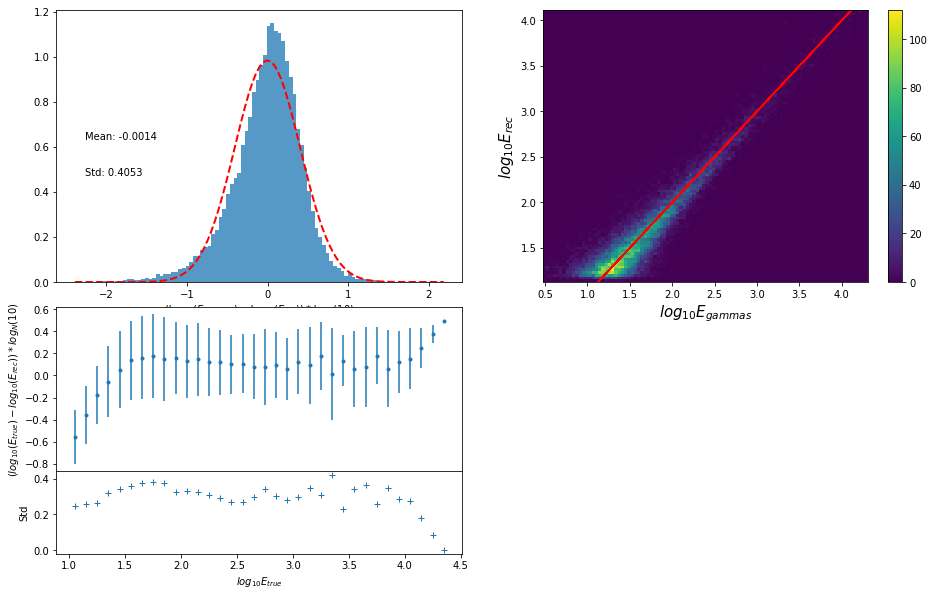

In [17]:
test_cut['e_rec'] = RFreg_Energy.predict(test_cut[features])
plt.figure(figsize=(16,10))
plot_dl2.plot_e(test_cut,True)

<font size="4">
    Now the error is 41%.
    <br>
    <br>
    Let's do a last test. We will use all events, but using the impact parameter as a feature.

In [18]:
features = ['intensity',                                                                                  
            'time_gradient',                                                                              
            'width',                                                                                      
            'length',                                                                                     
            'wl',                                                                                         
            'phi',                                                                                        
            'psi',
            'skewness',
            'kurtosis',
            'mc_core_distance']

<font size="4">
And train Random Forests for Energy and Disp reconstruction.

In [19]:
RFreg_Energy, RFreg_Disp = reco_dl1_to_dl2.trainRFreco(train,features)

Given features:  ['intensity', 'time_gradient', 'width', 'length', 'wl', 'phi', 'psi', 'skewness', 'kurtosis', 'mc_core_distance']
Number of events for training:  832375
Training Random Forest Regressor for Energy Reconstruction...
Random Forest trained!
Training Random Forest Regressor for disp Reconstruction...
Random Forest trained!
Done!


Feature importances (gini index)
1. intensity (0.508671)
2. mc_core_distance (0.374381)
3. time_gradient (0.051646)
4. skewness (0.020100)
5. width (0.012972)
6. phi (0.012797)
7. length (0.010550)
8. wl (0.004472)
9. psi (0.002407)
10. kurtosis (0.002004)


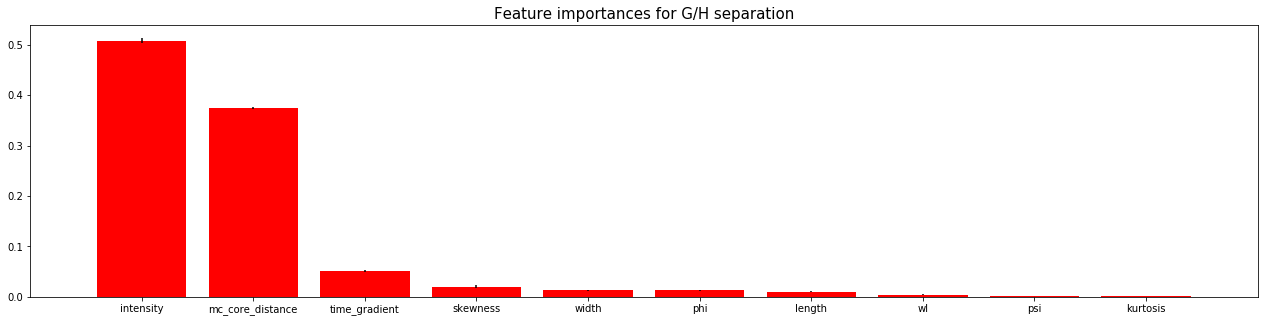

In [20]:
from lstchain.visualization.plot_dl2 import plot_importances
plt.figure(figsize=(22,5))
plot_importances(RFreg_Energy, features);

<font size="4">
Apply RF to test data to reconstruct Energy.

/Users/thomasvuillaume/anaconda/envs/cta-dev/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


-0.00047821613531059726 0.440581484947677


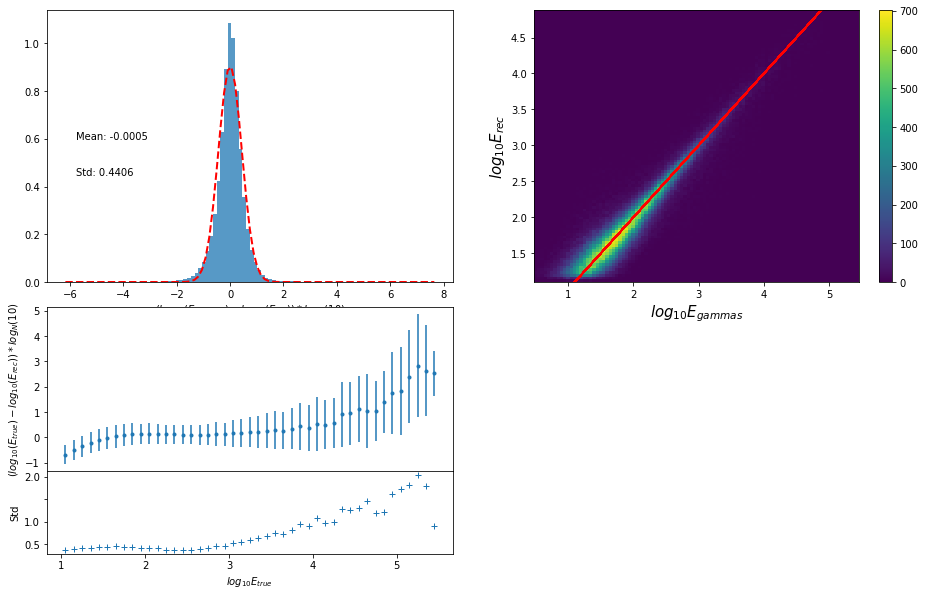

In [21]:
test['e_rec'] = RFreg_Energy.predict(test[features])
plt.figure(figsize=(16,10))
plot_dl2.plot_e(test,True)
plt.savefig("gaussian_fit.png")

<font size="4">
    Now the error is 46%.
    <br>
    <br>